# Direction

1. Go to https://www.skinmedica.com/us/allproducts/
2. Click "Load More" on the website to see all the products.

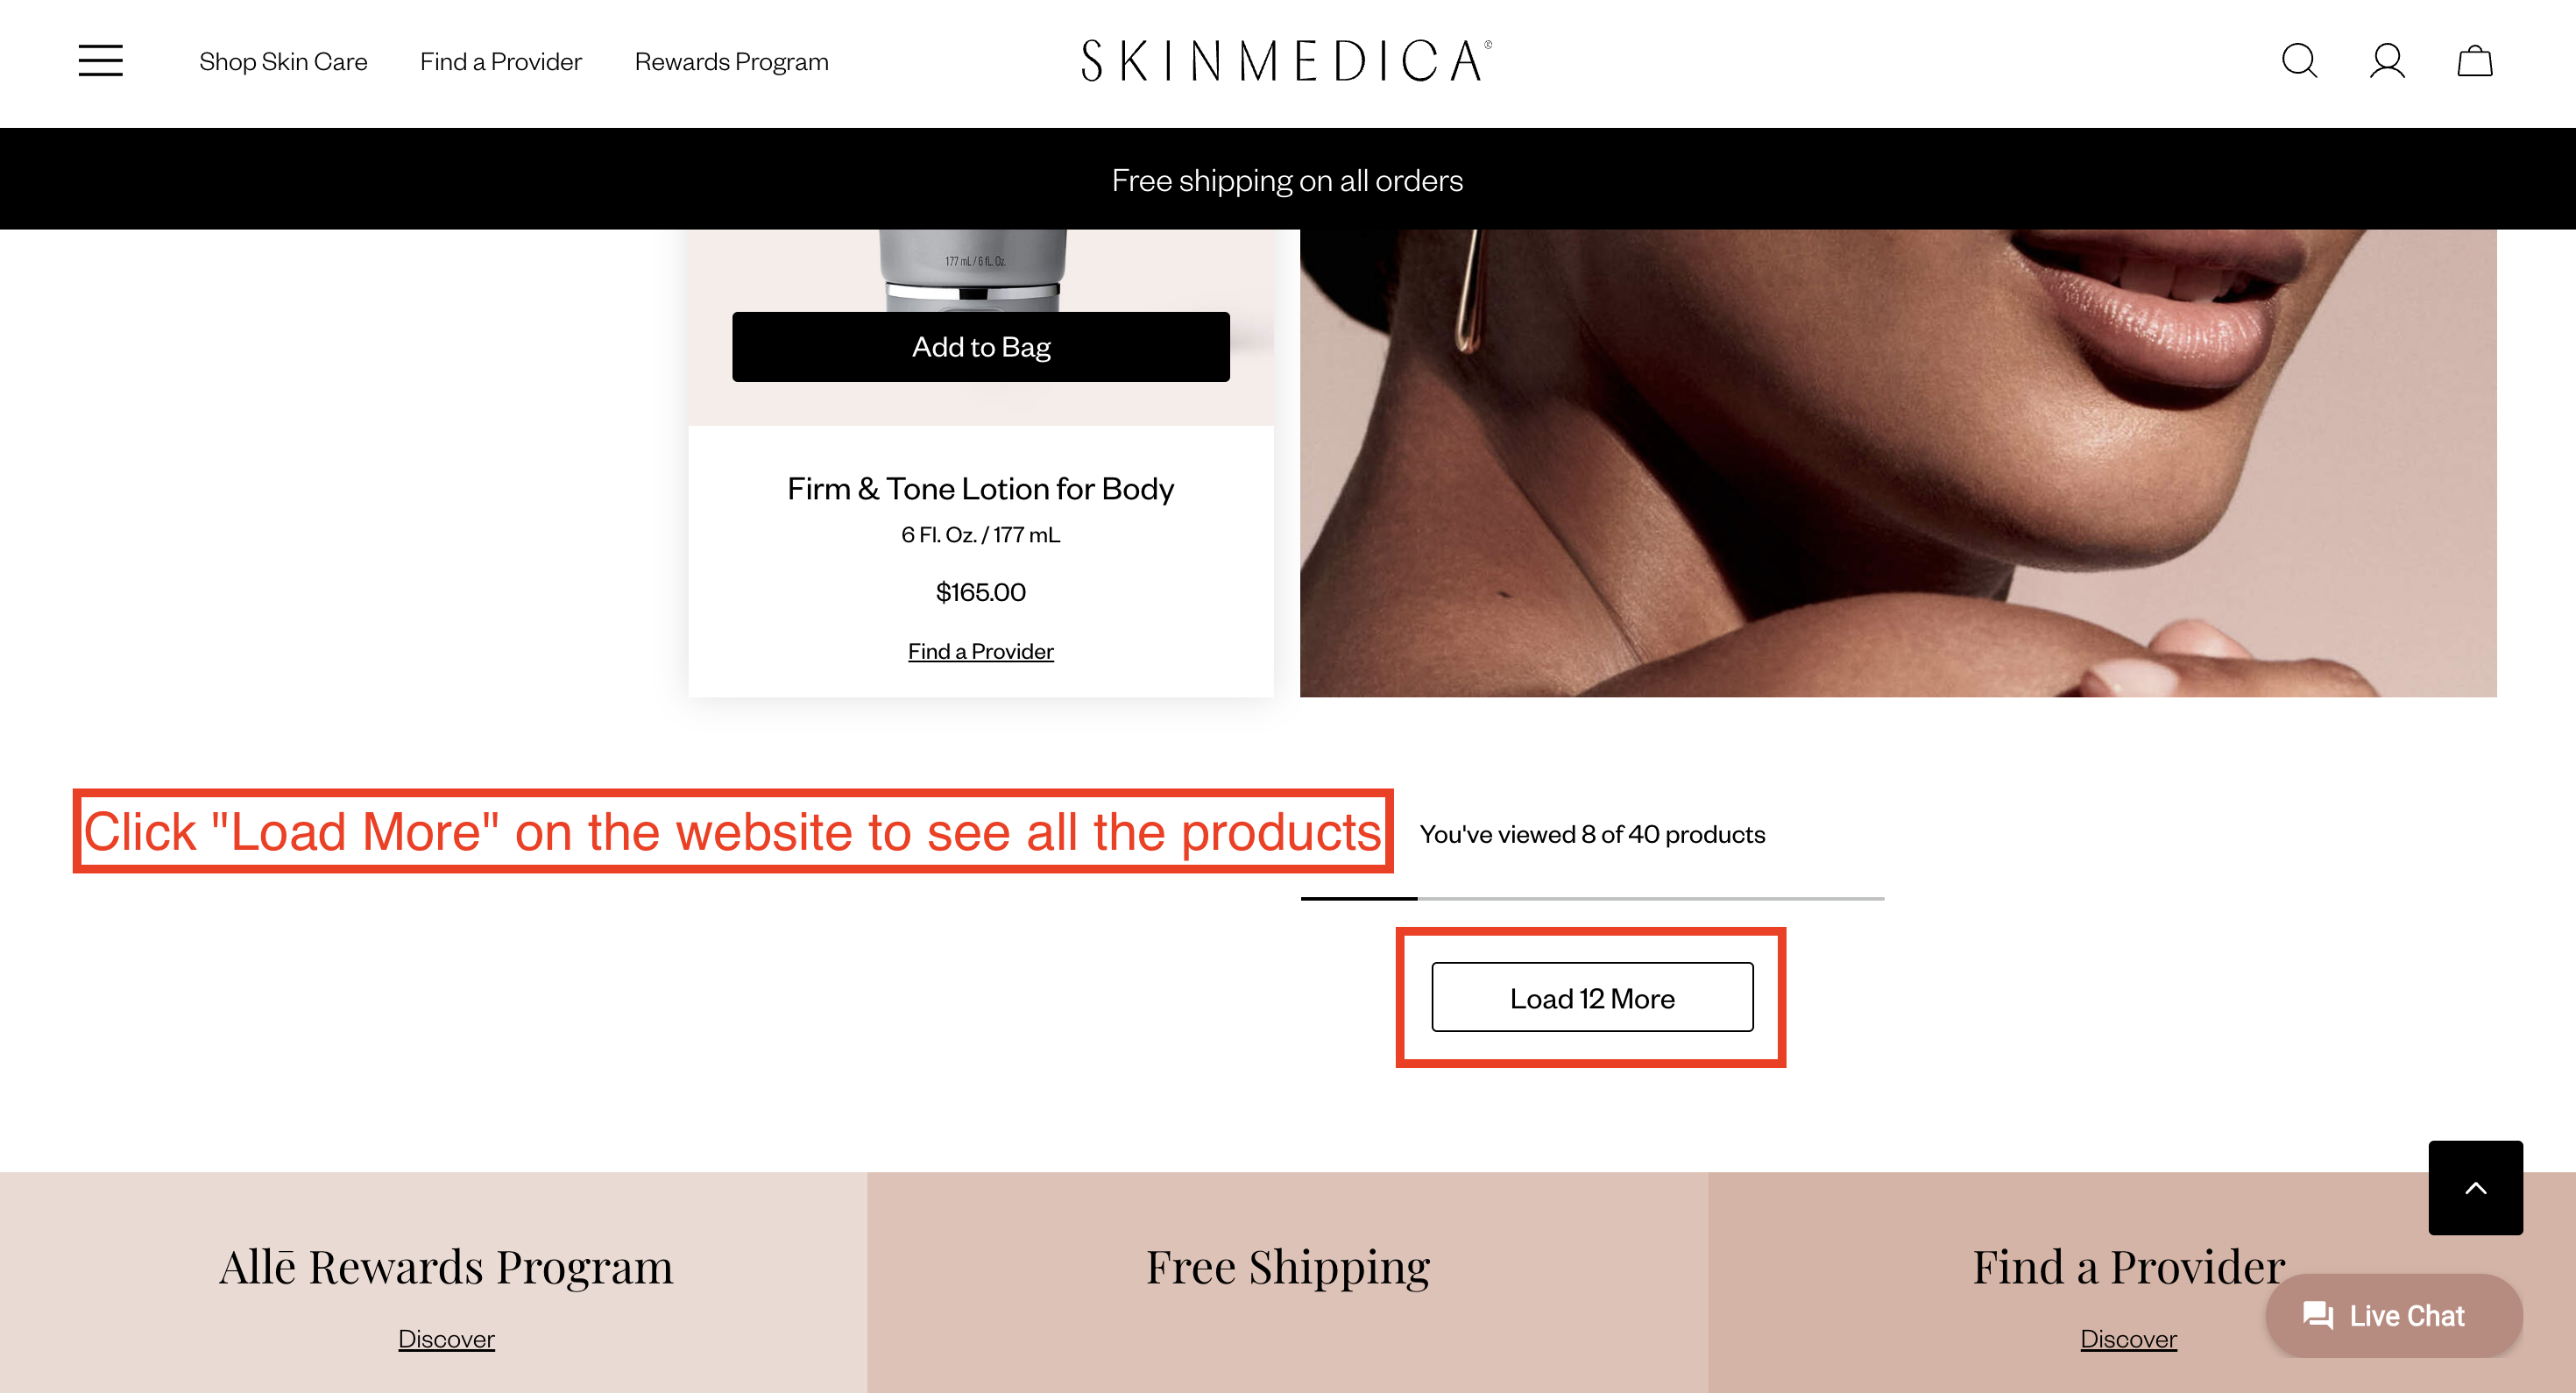

3.   Press fn + F12 to inspect the body part of the HTML code.
4.   Copy all the HTML code and paste it into the text below html = '''...''', and remove the #




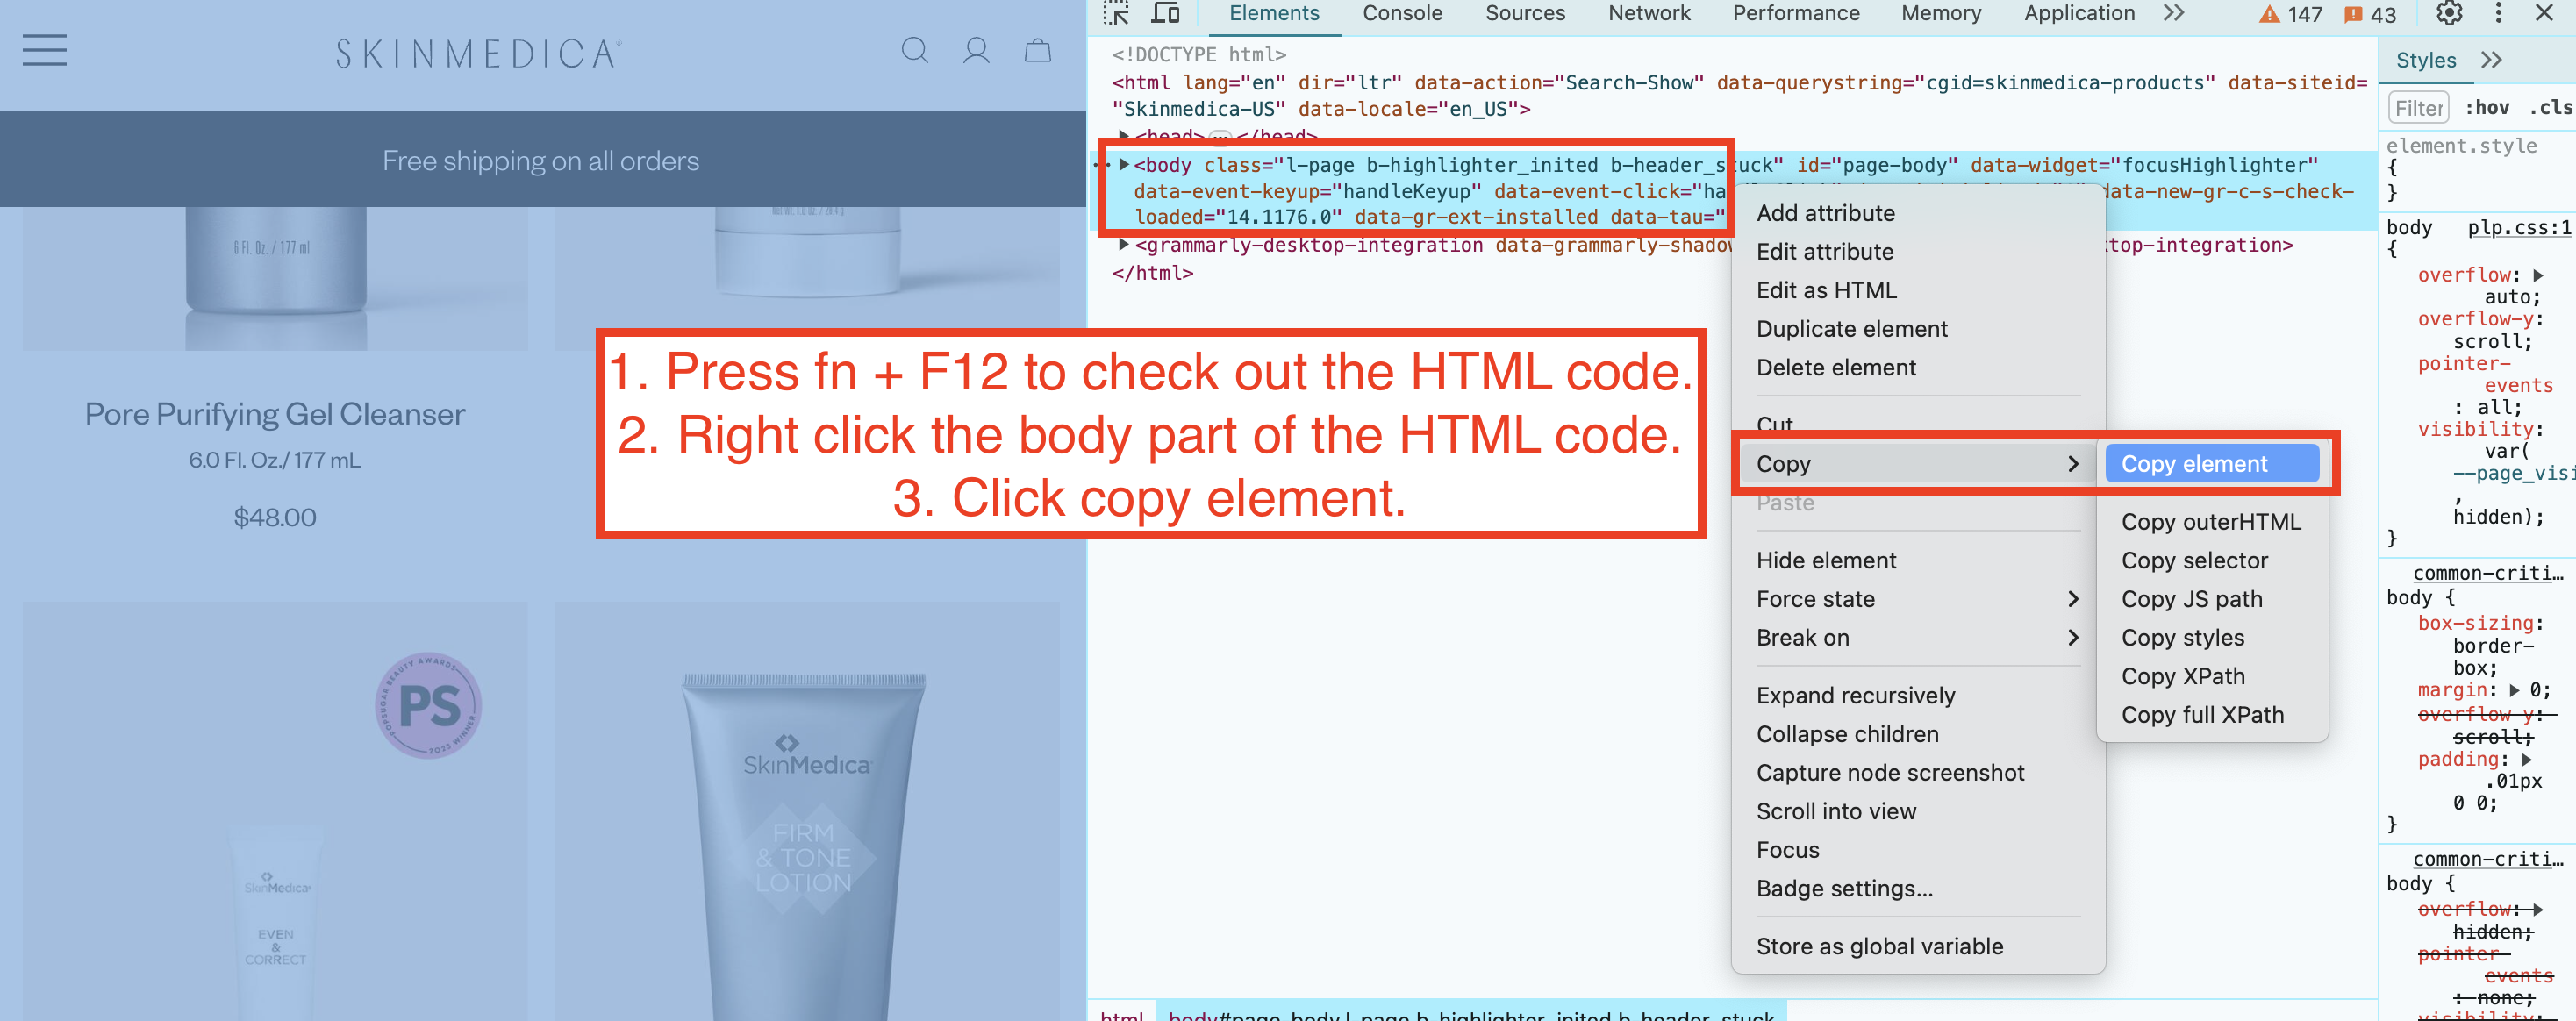

In [ ]:
# html = '''...'''

## Get Product URLs

In [ ]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')
a_tags = soup.find_all('a', class_='b-product_tile-image_link')
urls = []
for a_tag in a_tags:
    url = a_tag.get('href')
    full_url = 'https://www.skinmedica.com' + url
    urls.append(full_url)

# Convert the list to a string representation with brackets
all_urls = urls
print(len(urls))
print(all_urls)


8
['https://www.skinmedica.com/us/product-category/brighteners/98295.html', 'https://www.skinmedica.com/us/product-category/brighteners/98296.html', 'https://www.skinmedica.com/us/skin-concern/fine-line-and-wrinkles/95603.html', 'https://www.skinmedica.com/us/skin-concern/acne-and-blemishes/20078886.html', 'https://www.skinmedica.com/us/skin-concern/acne-and-blemishes/20079083.html', 'https://www.skinmedica.com/us/skin-concern/texture/96395.html', 'https://www.skinmedica.com/us/product-category/brighteners/98303.html', 'https://www.skinmedica.com/us/skin-concern/texture/97036.html']


## Get Product Informaiton

In [ ]:
!pip install fake-useragent

In [ ]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import pandas as pd

def scrape_product_info(url):
    ua = UserAgent()
    headers = {'User-Agent': ua.random}

    # Send a GET request to the URL with headers
    response = requests.get(url, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Get Product Title
        title_tag = soup.find('head').find('title')
        product_title = title_tag.text.strip()

        # Get price
        price_tag = soup.find('span', class_='b-price-item')
        if price_tag:
            product_price = price_tag.text.strip()
        else:
            product_price = 'Price not found.'

        # Get skin type
        type_tag = soup.find('span', class_="b-badges-text")
        if type_tag:
            skin_type = type_tag.text.strip()
        else:
            skin_type = 'No skin type.'

        # Get benefits
        benefits = ''
        div_tag = soup.find('div', class_='b-benefits-content')
        if div_tag:
            ul_tags = div_tag.find_all('ul')
            for tag in ul_tags:
                text = tag.text.strip()
                benefits += text.replace('\n', ', ') + ", "
            benefits = benefits.rstrip(", ")
        else:
            benefits = "No benefits."

        # Get key ingredients
        ingredients = ''
        div_tag = soup.find('div', class_='b-ingredients-content')
        if div_tag:
            strong_tags = div_tag.find_all('strong')
            for tag in strong_tags:
                text = tag.text.strip()
                ingredients += text + ", "
            ingredients = ingredients.rstrip(", ")
        else:
            ingredients = "No ingredients."

        # Get all ingredients
        p_tag = soup.find('p', class_='b-ingredients-description m-left')
        if p_tag:
            all_ingredients = p_tag.text.strip()
        else:
            all_ingredients = 'No all ingredients.'

        # Get How to use
        ul_tag = soup.find('ul', class_='b-how_to_use-list')
        if ul_tag:
            how_to_use = ul_tag.text.strip()
        else:
            how_to_use = 'No how to use.'

        # Get Image
        img_tag = soup.find('img', class_='b-results-image')
        if img_tag:
            image_url = img_tag.get('src')
        else:
            image_url = 'Image URL not found.'

        # Return product information as a dictionary
        return {
            'Product Title': product_title,
            'Product Price': product_price,
            'Skin Type': skin_type,
            'Benefits': benefits,
            'Key Ingredients': ingredients,
            'All Ingredients': all_ingredients,
            'How to Use': how_to_use,
            'Before & After Image': image_url
        }
    else:
        print(f"Failed to retrieve the webpage: {url}")
        return None

def main(all_urls):
    # Create an empty list to store scraped data
    scraped_data = []

    # Scrape product information for each URL
    for url in all_urls:
        product_info = scrape_product_info(url)
        if product_info:
            scraped_data.append(product_info)

    # Create DataFrame
    df = pd.DataFrame(scraped_data)

    return df

if __name__ == '__main__':

    df = main(all_urls)
    print(df)


                                        Product Title Product Price  \
0   Even & Correct Advanced Brightening | SkinMedica®       $178.00   
1   Even & Correct Brightening Treatment Pads | Sk...        $60.00   
2           Firm & Tone Lotion for Body | SkinMedica®       $165.00   
3        Even & Correct Dark Spot Cream | SkinMedica®        $88.00   
4            HA⁵® Rejuvenating Hydrator | SkinMedica®       $184.00   
5                  TNS® Advanced+ Serum | SkinMedica®       $295.00   
6             Acne Clarifying Treatment | SkinMedica®        $88.00   
7           Pore Purifying Gel Cleanser | SkinMedica®        $48.00   
8                   Dermal Repair Cream | SkinMedica®       $134.00   
9            HA⁵® Rejuvenating Hydrator | SkinMedica®       $124.00   
10             Instant Bright Eye Cream | SkinMedica®        $92.00   
11                     LUMIVIVE® System | SkinMedica®       $268.00   
12                      TNS Eye Repair® | SkinMedica®       $106.00   
13    

## Data Cleaning

In [ ]:
# Data Cleaning
df2 = df.copy()
df2['Product URLs'] = all_urls
df2['Product Price'] = df2['Product Price'].str.replace('$', '')

## Download Excel file

In [ ]:
# Download Excel file
from google.colab import files
df2.to_excel('SkinMecidica_products.xlsx', index=False)
files.download('SkinMecidica_products.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>